# Micro tutorial - Subplotting
In this micro tutorial we learn how to create subplots using matplotlib and seaborn.

### Import all Python libraries needed

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

### Create the DataFrame

We are using the [Pokemon with stats](https://www.kaggle.com/abcsds/pokemon) dataset from Kaggle.

The cell below import the dataset file and create the pokemon pandas DataFrame. So use show the 4 first rows using `pd.DataFrame.head` function.

In [2]:
pokemon_filepath = '../datasets/pokemon.csv'
pokemon = pd.read_csv(pokemon_filepath)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Plotting (and subplotting) samples

As we can see in the matplotlib documentation (references at the end of file), `subplots()` without arguments returns a Figure and a single Axes, which we can unpack using the syntax bellow.

Text(0.5, 0.98, 'A single ax with no data')

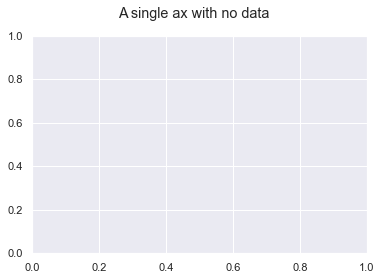

In [109]:
fig, ax = plt.subplots()
fig.suptitle('A single ax with no data')

Thus, we can give two arguments to subplots functions: nrows and ncols. If given in that order, we don't need to type the arg names, just its values. In our example we create a plot with 1 row and 2 columns, still no data passed.

Text(0.5, 0.98, '1 row x 2 columns axes with no data')

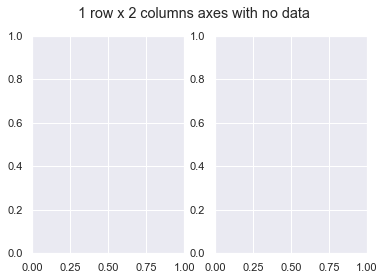

In [110]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('1 row x 2 columns axes with no data')

Now `axes` is an array of AxesSubplot, so we can access each ax separetely and set a different title, for instance.

More arguments:

- *figsize* set the total dimension of our figure
- *sharex* and *sharey* are used to share one or both axes between the charts (needed data to work)

Text(0.5, 1.0, 'Title of the first chart')

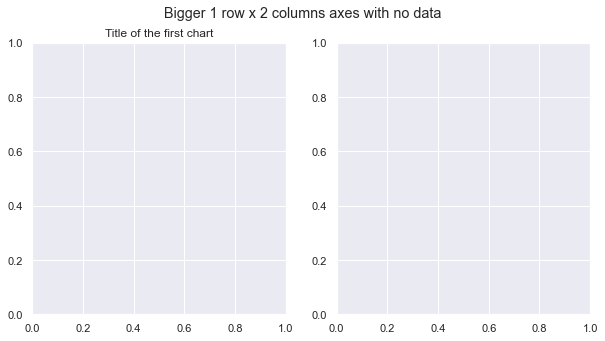

In [111]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')
axes[0].set_title('Title of the first chart')

An so on

Text(0.5, 0.98, '3 rows x 4 columns axes with no data')

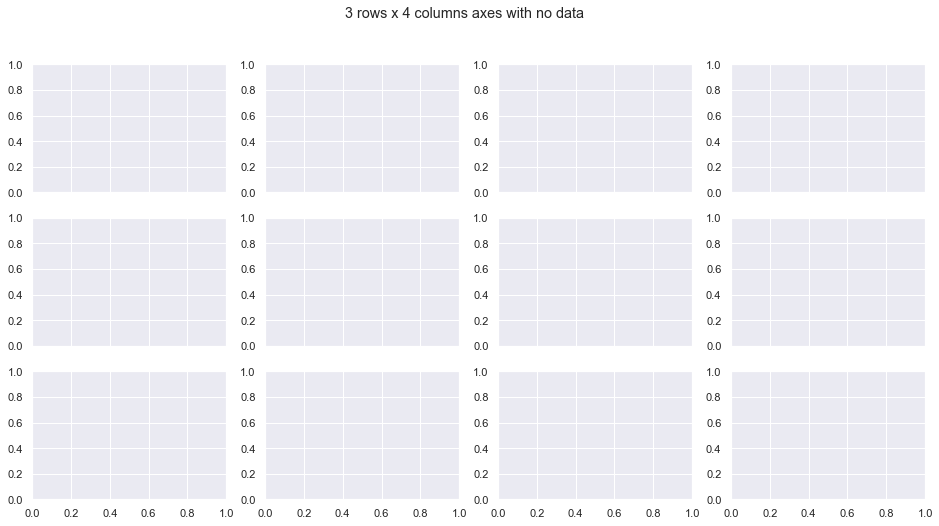

In [112]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
fig.suptitle('3 rows x 4 columns axes with no data')

### Using data

We select three Pokemon to use in the next example. The three initial Pokemon of 1st Generation: Bulbasaur, Charmander and Squirtle.

In [113]:
# bulbasaur = pokemon[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']][pokemon.loc[:, 'Name'] == 'Bulbasaur']
poke_num = pokemon[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].set_index('Name')

bulbasaur = poke_num.loc['Bulbasaur']
charmander = poke_num.loc['Charmander']
squirtle = poke_num.loc['Squirtle']

Then, we create a plot with 3 subplots in a 1 row x 3 columns figure.

We use `sns.barplot` where we need to set the a argument with the correspondent element from `axes` variable.

Text(0.5, 1.0, 'Squirtle')

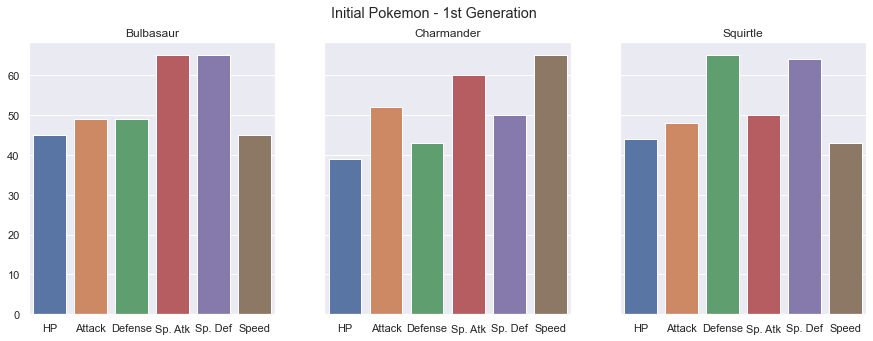

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[0].set_title(bulbasaur.name)

# Charmander
sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
axes[1].set_title(charmander.name)

# Squirtle
sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
axes[2].set_title(squirtle.name)

#### Final example

And a final example plottin a 2 rows X 3 columns plot showing Pokemon stats by Generation.

We use `sns.boxplot`

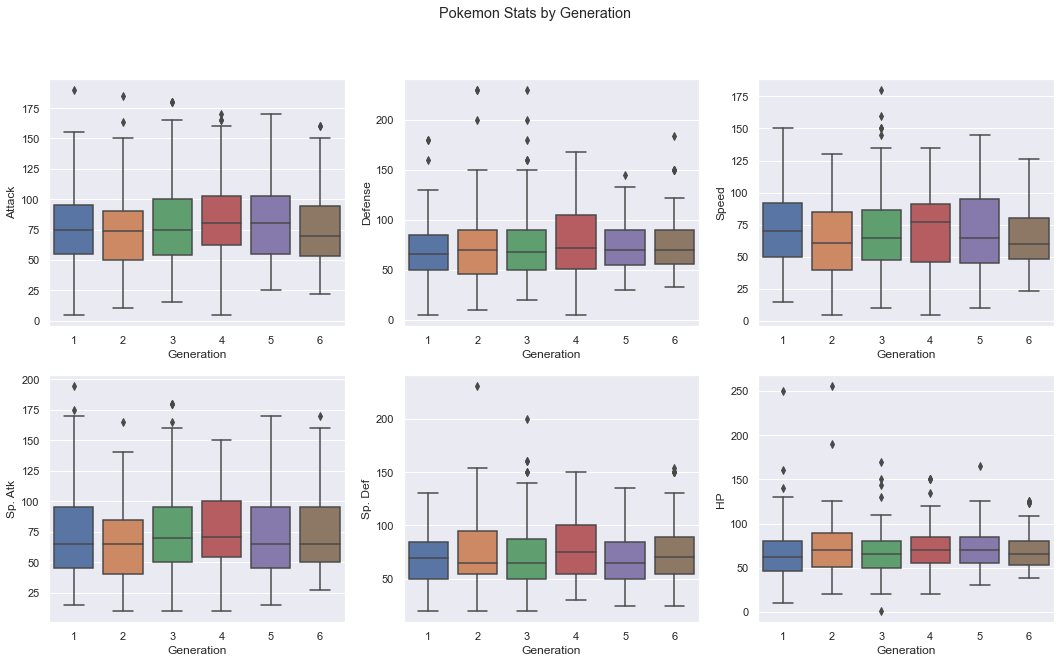

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')

sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
sns.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
sns.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
sns.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
sns.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
sns.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

# References

**matplotlib** | [Creating multiple subplots using plt.subplot](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html)

**matplotlib** | [matplotlib.pyplot.subplots](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)

**seaborn** | [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

**seaborn** | [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)